<a href="https://colab.research.google.com/github/dansarmiento/ColaboratoryNotebooks/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score 



In [2]:
df = pd.read_csv('concrete.csv')
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
X = df.copy()
y = X.pop('CompressiveStrength')

In [4]:
# train and score baseline model
baseline = RandomForestRegressor(criterion='mae', random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring='neg_mean_absolute_error'
)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:4

In [5]:
baseline_score = -1 * baseline_score.mean()

In [6]:
print(f'MAE baseline score: {baseline_score:.4}')

MAE baseline score: 8.232


In [8]:
X = df.copy()
y = X.pop('CompressiveStrength')

# create synthetic features 
X['FCRatio'] = X['FineAggregate'] / X['CoarseAggregate']
X['AggCmtRatio'] = (X['CoarseAggregate'] + X['FineAggregate']) / X['Cement']
X['WtrCmtRatio'] = X['Water'] / X['Cement']

In [9]:
# train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion='mae', random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring='neg_mean_absolute_error'
)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:4

In [14]:
score = -1 * score.mean()
print(f'MAE score with ratio features: {score:.3}')

MAE score with ratio features: 7.95


In [15]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
%matplotlib inline

In [16]:
plt.style.use('seaborn-whitegrid')

In [17]:
df = pd.read_csv('autos.csv')
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [18]:
# rule of thumb - anything that *must* have a float dtype is not discrete
# categoricals can be treated as discrete by doing label encoding (like ordinal encoding)

X = df.copy()
y = X.pop('price')

In [19]:
# label encoding for categoricals
for col in X.select_dtypes('object'):
  X[col], _ = X[col].factorize()

# all discrete features should now have int dtypes 
X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22


In [20]:
discrete_features = X.dtypes == int

In [21]:
# sklearn has two mutual info metrics in its feature_selection module: 
# mutual_info_regression for real valued targets
# mutual_info_cassif for categorical targets
from sklearn.feature_selection import mutual_info_regression 

def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores 
  

In [22]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show some features with their MI scores

curb_weight          1.506361
highway_mpg          0.958926
length               0.616866
bore                 0.508232
stroke               0.386362
num_of_cylinders     0.332193
compression_ratio    0.133784
fuel_type            0.047298
Name: MI Scores, dtype: float64

In [24]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Information Scores')

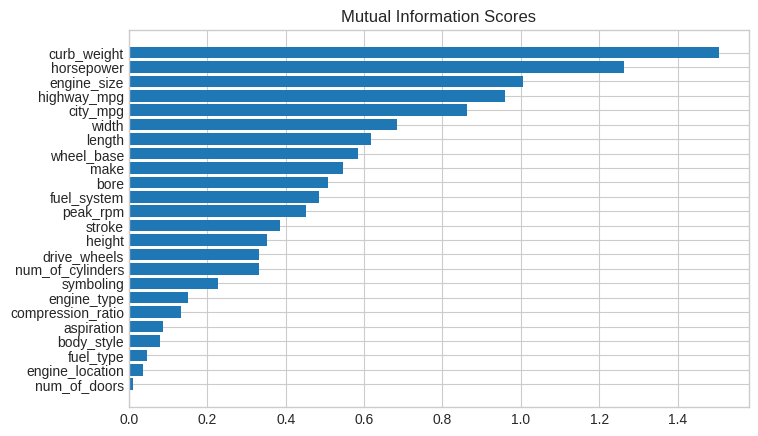

In [25]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

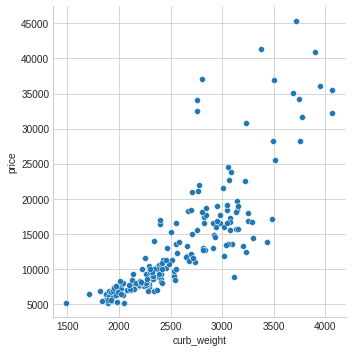

In [26]:
sns.relplot(x='curb_weight', y='price', data=df)

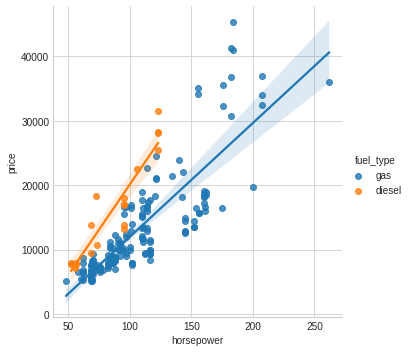

In [27]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=df)

In [28]:
!pip install git+https://github.com/Kaggle/learntools.git --quiet

In [29]:
from learntools.core import binder 
binder.bind(globals())
from learntools.feature_engineering_new.ex2 import *

In [30]:
# set matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10,)

In [31]:
df = pd.read_csv('ames.csv')

In [41]:
# putting together the steps
def make_mi_scores_new(X, y):
  X = X.copy()
  for col in X.select_dtypes(['object','category']):
    X[col], _ = X[col].factorize()
  discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
  mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

In [35]:
def plot_mi_scores_new(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Information Scores')

In [37]:
df.head()
features = ['YearBuilt', 'MoSold', 'ScreenPorch']

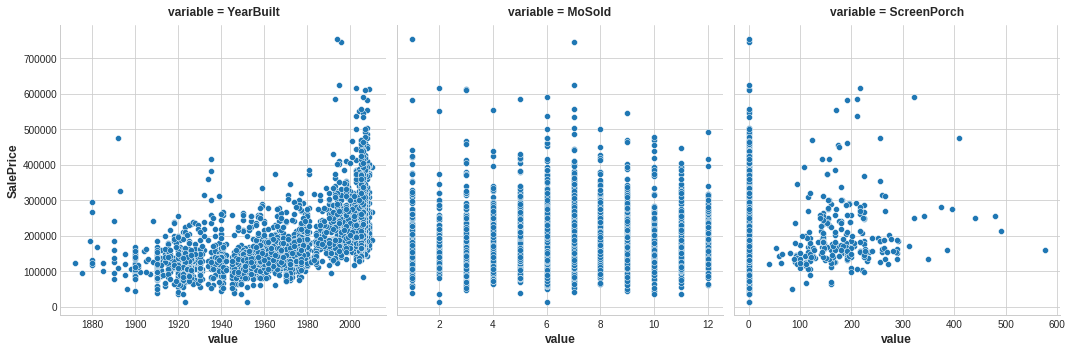

In [38]:
sns.relplot(x='value', y='SalePrice', col='variable', data=df.melt(id_vars='SalePrice', value_vars=features), facet_kws=dict(sharex=False))
# which one has the smallest range of possible values = yearbuilt

In [42]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores_new(X, y)

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


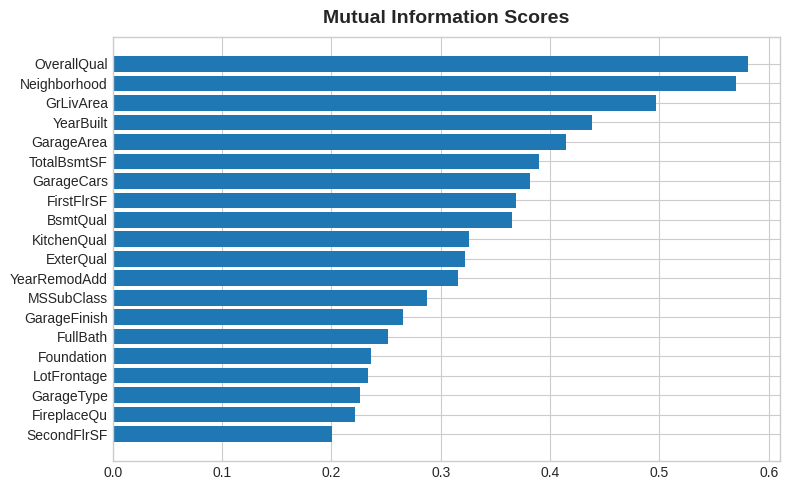

In [43]:
print(mi_scores.head(20))
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores_new(mi_scores.head(20))

ExterCond           0.020934
KitchenAbvGr        0.017677
BsmtHalfBath        0.013719
LotConfig           0.013637
ScreenPorch         0.012981
PoolArea            0.012831
MiscVal             0.010997
LowQualFinSF        0.009328
Heating             0.007622
Functional          0.006380
MiscFeature         0.004322
Street              0.003381
Condition2          0.003176
RoofMatl            0.002620
PoolQC              0.001370
Utilities           0.000291
Threeseasonporch    0.000000
BsmtFinSF2          0.000000
MoSold              0.000000
LandSlope           0.000000
Name: MI Scores, dtype: float64


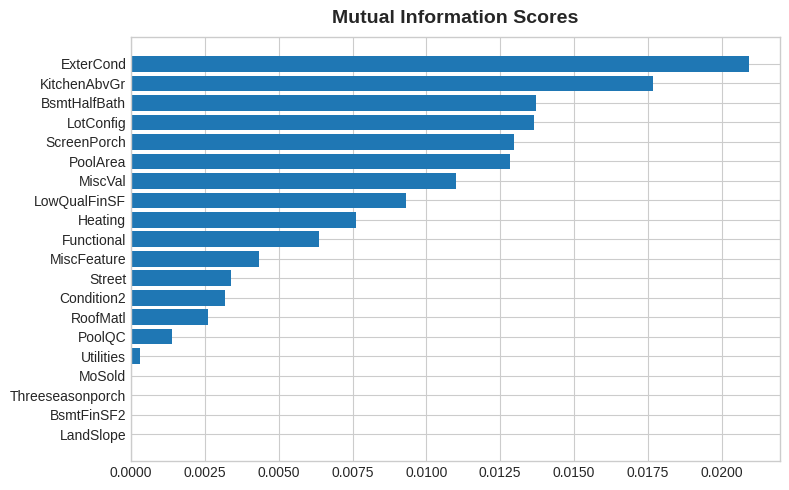

In [44]:
print(mi_scores.tail(20))
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores_new(mi_scores.tail(20))

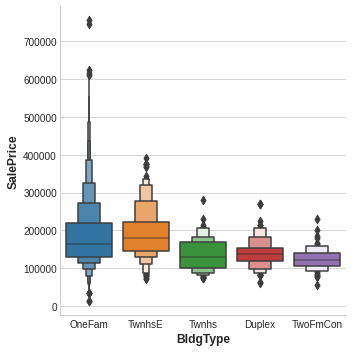

In [45]:
sns.catplot(x='BldgType', y='SalePrice', data=df, kind='boxen')

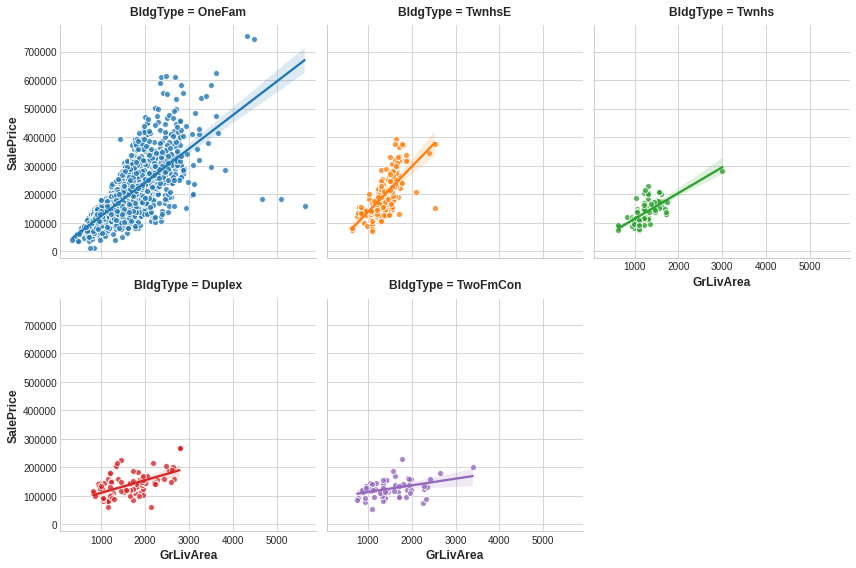

In [46]:
feature = 'GrLivArea'

sns.lmplot(x=feature, y='SalePrice', hue='BldgType', col='BldgType',
           data=df, scatter_kws={'edgecolor':'w'}, col_wrap=3, height=4,)